# **1**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

A = np.array([[1,1,0], [1,1,0], [1,0,1], [1,0,1]])
b = np.array([1,3,8,2])

B = A.T @ A
print("B :\n",B)

c = A.T @ b
print("c :\n",c)

# print(np.linalg.matrix_rank(A))
# Ab = np.hstack((A, b.reshape(-1, 1)))
# print(np.linalg.matrix_rank(Ab))

try:
    X = np.linalg.solve(B, c)
    print("Solution X:\n", X)
except np.linalg.LinAlgError as e:
    print("An error occurred:", e)

B :
 [[4 2 2]
 [2 2 0]
 [2 0 2]]
c :
 [14  4 10]
An error occurred: Singular matrix


In [16]:
Bc = sp.Matrix([[4,2,2,14], [2,2,0,4], [2,0,2,10]])
# A = sp.Matrix([[1,1,0,1], [1,1,0,3], [1,0,1,8], [1,0,1,2]])
rref_Bc, pivot_columns = Bc.rref()

print("Reduced Row Echelon Form of A:\n", rref_Bc)
print("Pivot columns:", pivot_columns)

Reduced Row Echelon Form of A:
 Matrix([[1, 0, 1, 5], [0, 1, -1, -3], [0, 0, 0, 0]])
Pivot columns: (0, 1)


# **2**

In [17]:
A = sp.Matrix([[2,-3,2], [1,7,3], [3,-4,2],[2,-5,6]])
Ab = sp.Matrix([[2,-3,2,4], [1,7,3,-5], [3,-4,2,8],[2,-5,6,-4]])
rref_A, pivot_columns = A.rref()

print("Reduced Row Echelon Form of A:\n", rref_A)
print("Pivot columns:", pivot_columns)

rref_Ab, pivot_columns_Ab = Ab.rref()

print("Reduced Row Echelon Form of Ab:\n", rref_Ab)
print("Pivot columns Ab:", pivot_columns_Ab)

Reduced Row Echelon Form of A:
 Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0]])
Pivot columns: (0, 1, 2)
Reduced Row Echelon Form of Ab:
 Matrix([[1, 0, 0, 70/19], [0, 1, 0, -6/19], [0, 0, 1, -41/19], [0, 0, 0, 0]])
Pivot columns Ab: (0, 1, 2)


In [18]:
A1 = np.array([[2,-3,2], [1,7,3], [3,-4,2]])
b1 = np.array([4,-5,8])

try:
    X_star = np.linalg.solve(A1, b1)
    print("Solution X:\n", X_star)
except np.linalg.LinAlgError as e:
    print("An error occurred:", e)

Solution X:
 [ 3.68421053 -0.31578947 -2.15789474]


# **4**

In [19]:
A = sp.Matrix([[2,-3,2], [1,7,3], [3,-4,2],[2,-5,6]])
Ab = sp.Matrix([[2,-3,2,2], [1,7,3,1], [3,-4,2,3],[2,-5,6,2]])
rref_A, pivot_columns = A.rref()

print("Reduced Row Echelon Form of A:\n", rref_A)
print("Pivot columns:", pivot_columns)

rref_Ab, pivot_columns_Ab = Ab.rref()

print("Reduced Row Echelon Form of Ab:\n", rref_Ab)
print("Pivot columns Ab:", pivot_columns_Ab)

Reduced Row Echelon Form of A:
 Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0]])
Pivot columns: (0, 1, 2)
Reduced Row Echelon Form of Ab:
 Matrix([[1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]])
Pivot columns Ab: (0, 1, 2)


# **6**

In [20]:
# Population data of Shiraz and corresponding years
years = np.array([1355, 1360, 1365, 1370, 1375, 1380, 1385, 1390, 1395, 1400])
populations = np.array([625813, 848279, 965117, 1089355, 1412895, 1987210, 2345678, 2412780, 2698285, 2917554]) / 1e6  # Convert to millions

# Convert years to years since the start of the table
x_data = years
y_data = np.log(populations)  # Logarithm of the population for linearizing the model

# Calculate averages
x_mean = np.mean(x_data)
y_mean = np.mean(y_data)

# Calculate values for the linear equation
numerator_b = np.sum((x_data - x_mean) * (y_data - y_mean))
denominator_b = np.sum((x_data - x_mean)**2)
b = numerator_b / denominator_b
A = y_mean - b * x_mean

# Calculate a from A
a = np.exp(A)

a, b


(1.0611510502405396e-21, 0.03536807596081004)

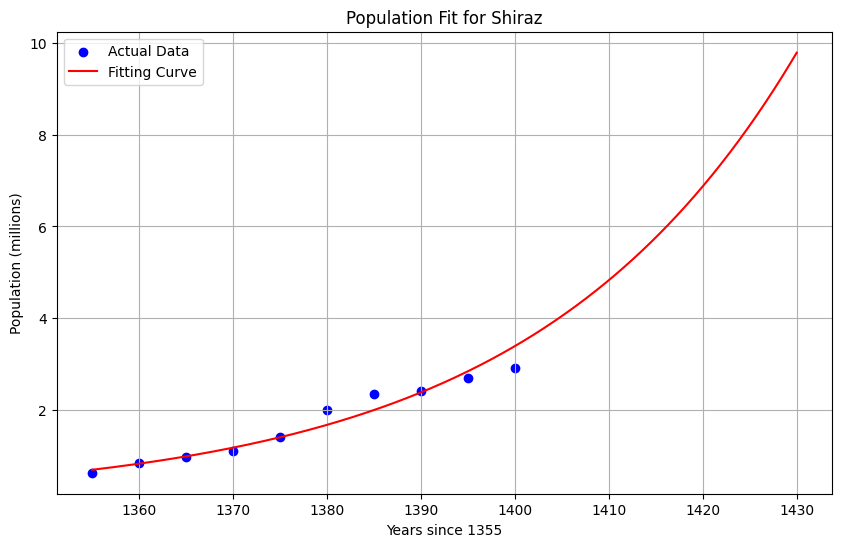

9.790532883803003

In [21]:
# Define the fitting function based on the exponential model
def fitted_model(x):
    return a * np.exp(b * x)

# Generate x values for plotting, extending to year 1430
x_values = np.linspace(min(x_data), max(x_data) + 30, 400)  # Extends to the year 1430
fitted_y_values = fitted_model(x_values)

# Plot actual data points and the fitting curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, populations, color='blue', label='Actual Data')  # Plotting the actual data points
plt.plot(x_values, fitted_model(x_values), color='red', label='Fitting Curve')  # Plotting the fitting curve

# Set labels for axes and the title of the plot
plt.xlabel('Years since 1355')
plt.ylabel('Population (millions)')
plt.title('Population Fit for Shiraz')
plt.legend()
plt.grid(True)
plt.show()

# Estimate the population of Shiraz in the year 1430
x_1430 = 1430   # Calculate the number of years from 1355 to 1430
population_1430 = fitted_model(x_1430)
population_1430


In [22]:
W = np.array([[1,1355],[1,1360],[1,1365],[1,1370],[1,1375],[1,1380],[1,1385],[1,1390],[1,1395],[1,1400]])
Y = np.log(np.array([625813, 848279, 965117, 1089355, 1412895, 1987210, 2345678, 2412780, 2698285, 2917554]) / 1e6)

A,b = np.linalg.solve(W.T@W, W.T@Y)


a = pow(math.e,A)
a, b

(1.0611510502700159e-21, 0.035368075960789884)

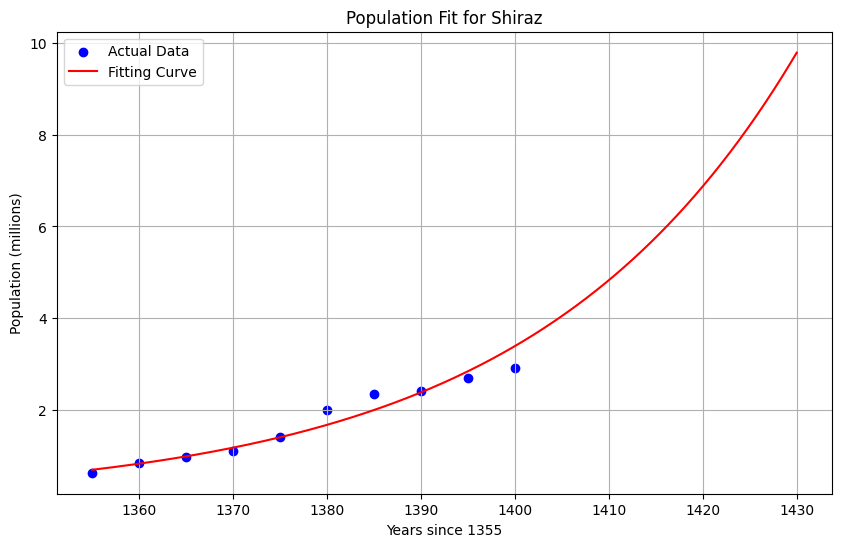

9.790532883792732

In [23]:
# Define the fitting function based on the exponential model
def fitted_model(x):
    return a * np.exp(b * x)

# Generate x values for plotting, extending to year 1430
x_values = np.linspace(min(x_data), max(x_data) + 30, 400)  # Extends to the year 1430
fitted_y_values = fitted_model(x_values)

# Plot actual data points and the fitting curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, populations, color='blue', label='Actual Data')  # Plotting the actual data points
plt.plot(x_values, fitted_model(x_values), color='red', label='Fitting Curve')  # Plotting the fitting curve

# Set labels for axes and the title of the plot
plt.xlabel('Years since 1355')
plt.ylabel('Population (millions)')
plt.title('Population Fit for Shiraz')
plt.legend()
plt.grid(True)
plt.show()

# Estimate the population of Shiraz in the year 1430
x_1430 = 1430   # Calculate the number of years from 1355 to 1430
population_1430 = fitted_model(x_1430)
population_1430
